In [9]:
from pyspark.sql import SparkSession

spark = SparkSession.builder.appName("BigDataPractice").getOrCreate()

data = [("Eka", 8, "siswa", "nangis", "Perempuan"), 
        ("Dhiya", 30, "penari", "menari", "Perempuan"), 
        ("Nasywaa",18, "guru", "membaca", "Perempuan"), 
        ("ahmad", 20, "bodyguard", "berkelahi", "Laki-laki")]
columns = ["Nama", "Usia", "Pekerjaan", "Hobi", "Gender"]

df = spark.createDataFrame(data, columns)

df.show()

+-------+----+---------+---------+---------+
|   Nama|Usia|Pekerjaan|     Hobi|   Gender|
+-------+----+---------+---------+---------+
|    Eka|   8|    siswa|   nangis|Perempuan|
|  Dhiya|  30|   penari|   menari|Perempuan|
|Nasywaa|  18|     guru|  membaca|Perempuan|
|  ahmad|  20|bodyguard|berkelahi|Laki-laki|
+-------+----+---------+---------+---------+



In [11]:
from pyspark.sql import SparkSession

spark = SparkSession.builder.appName("BigDataPractice").getOrCreate()

data = [("Eka", 8, "siswa", "nangis", "Perempuan"), 
        ("Dhiya", 30, "penari", "menari", "Perempuan"), 
        ("Nasywaa",18, "guru", "membaca", "Perempuan"), 
        ("ahmad", 20, "bodyguard", "berkelahi", "Laki-laki")]
columns = ["Nama", "Usia", "Pekerjaan", "Hobi", "Gender"]

df = spark.createDataFrame(data, columns)

df.show()

# Filtering data
df_filtered = df.filter(df['Usia'] > 30)
df_filtered.show()

# Menghitung rata-rata usia
from pyspark.sql.functions import avg
df.groupBy().agg(avg("Usia")).show()

# Mengurutkan data berdasarkan usia
df_sorted = df.orderBy("Usia", ascending=False)
df_sorted.show()

+-------+----+---------+---------+---------+
|   Nama|Usia|Pekerjaan|     Hobi|   Gender|
+-------+----+---------+---------+---------+
|    Eka|   8|    siswa|   nangis|Perempuan|
|  Dhiya|  30|   penari|   menari|Perempuan|
|Nasywaa|  18|     guru|  membaca|Perempuan|
|  ahmad|  20|bodyguard|berkelahi|Laki-laki|
+-------+----+---------+---------+---------+

+----+----+---------+----+------+
|Nama|Usia|Pekerjaan|Hobi|Gender|
+----+----+---------+----+------+
+----+----+---------+----+------+

+---------+
|avg(Usia)|
+---------+
|     19.0|
+---------+

+-------+----+---------+---------+---------+
|   Nama|Usia|Pekerjaan|     Hobi|   Gender|
+-------+----+---------+---------+---------+
|  Dhiya|  30|   penari|   menari|Perempuan|
|  ahmad|  20|bodyguard|berkelahi|Laki-laki|
|Nasywaa|  18|     guru|  membaca|Perempuan|
|    Eka|   8|    siswa|   nangis|Perempuan|
+-------+----+---------+---------+---------+



In [12]:
import pandas as pd

# Membuat DataFrame Pandas
data_pandas = {"Nama": ["Eka", "Dhiya", "Nasywaa", "ahmad"], "Usia": [8, 30, 10, 20]}
df_pandas = pd.DataFrame(data_pandas)

# Menampilkan DataFrame Pandas
df_pandas

,Nama,Usia
0,Eka,8
1,Dhiya,30
2,Nasywaa,10
3,ahmad,20


      Nama  Usia  Pekerjaan
0      Eka     8      siswa
1    Dhiya    30     penari
2  Nasywaa    18       guru
3    ahmad    30  bodyguard
            Usia
count   4.000000
mean   21.500000
std    10.630146
min     8.000000
25%    15.500000
50%    24.000000
75%    30.000000
max    30.000000


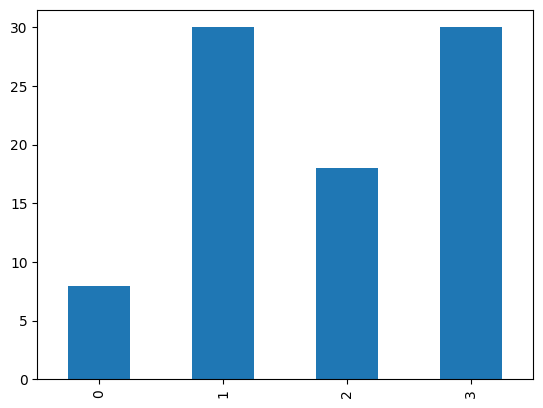

In [13]:
import pandas as pd

# Membuat DataFrame Pandas
data_pandas = {"Nama": ["Eka", "Dhiya", "Nasywaa", "ahmad"], "Usia": [8, 30, 18, 30]}
df_pandas = pd.DataFrame(data_pandas)

# Membuat DataFrame kedua
data_pandas_2 = {"Nama": ["Eka", "Dhiya", "Nasywaa", "ahmad"], "Pekerjaan": ["siswa", "penari", "guru", "bodyguard"]}
df_pandas_2 = pd.DataFrame(data_pandas_2)

# Join antara dua DataFrame
df_joined = pd.merge(df_pandas, df_pandas_2, on="Nama")
print(df_joined)

# Menghitung statistik deskriptif
print(df_pandas.describe())

# Plotting Data
import matplotlib.pyplot as plt
df_pandas['Usia'].plot(kind='bar')
plt.show()

In [14]:
# Mengonversi DataFrame dari PySpark ke Pandas
df_pandas_from_spark = df.toPandas()

# Mengonversi DataFrame dari Pandas ke PySpark
df_spark_from_pandas = spark.createDataFrame(df_pandas)

# Menampilkan DataFrame hasil konversi
df_pandas_from_spark, df_spark_from_pandas.show()

+-------+----+
|   Nama|Usia|
+-------+----+
|    Eka|   8|
|  Dhiya|  30|
|Nasywaa|  18|
|  ahmad|  30|
+-------+----+



(      Nama  Usia  Pekerjaan       Hobi     Gender
 0      Eka     8      siswa     nangis  Perempuan
 1    Dhiya    30     penari     menari  Perempuan
 2  Nasywaa    18       guru    membaca  Perempuan
 3    ahmad    20  bodyguard  berkelahi  Laki-laki,
 None)

In [15]:
# Mengonversi DataFrame dari PySpark ke Pandas
df_pandas_from_spark = df.toPandas()

# Mengonversi DataFrame dari Pandas ke PySpark
df_spark_from_pandas = spark.createDataFrame(df_pandas)

# Menampilkan DataFrame hasil konversi
df_pandas_from_spark, df_spark_from_pandas.show()

+-------+----+
|   Nama|Usia|
+-------+----+
|    Eka|   8|
|  Dhiya|  30|
|Nasywaa|  18|
|  ahmad|  30|
+-------+----+



(      Nama  Usia  Pekerjaan       Hobi     Gender
 0      Eka     8      siswa     nangis  Perempuan
 1    Dhiya    30     penari     menari  Perempuan
 2  Nasywaa    18       guru    membaca  Perempuan
 3    ahmad    20  bodyguard  berkelahi  Laki-laki,
 None)